In [1]:
# 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model

#이미지 크기 지정?
width = 28
height = 28

ModuleNotFoundError: No module named 'keras'

In [5]:
#훈련셋(x_train)과 시험셋(x_test) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

NameError: name 'mnist' is not defined

In [87]:
#훈련셋과 검증셋 분리
x_val = x_train[50000:]
x_train = x_train[:50000]

y_val = y_train[50000:]
y_train = y_train[:50000]

In [88]:
#데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환 ??
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

In [89]:
# 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
# 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [99]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 93us/step - loss: 0.2943 - acc: 0.8852 - val_loss: 0.1540 - val_acc: 0.9448
Epoch 2/30
50000/50000 [==============================] - 4s 87us/step - loss: 0.1284 - acc: 0.9547 - val_loss: 0.1001 - val_acc: 0.9647
Epoch 3/30
50000/50000 [==============================] - 4s 87us/step - loss: 0.0895 - acc: 0.9681 - val_loss: 0.1171 - val_acc: 0.9598
Epoch 4/30
50000/50000 [==============================] - 4s 83us/step - loss: 0.0714 - acc: 0.9752 - val_loss: 0.0753 - val_acc: 0.9740
Epoch 5/30
50000/50000 [==============================] - 4s 84us/step - loss: 0.0606 - acc: 0.9793 - val_loss: 0.0655 - val_acc: 0.9790
Epoch 6/30
50000/50000 [==============================] - 4s 87us/step - loss: 0.0517 - acc: 0.9825 - val_loss: 0.0617 - val_acc: 0.9795
Epoch 7/30
50000/50000 [==============================] - 4s 87us/step - loss: 0.0458 - acc: 0.9842 - val_loss: 0.0622 - val_acc

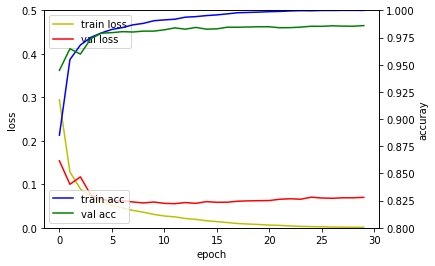

In [101]:
#학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [112]:
#모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 34us/step
## evaluation loss and_metrics ##
[0.05750950029636297, 0.9853]


In [113]:
#모델 저장
model.save('./model.h5')

TypeError: data type not understood

In [115]:
#모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

TypeError: data type not understood

In [111]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [114]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>
